In [2]:
DATA = "database/data.csv"

## FAQ

> **¿Qué es un archivo `csv`?**
> 
> Un archivo csv (Comma-Separated Values) es un tipo de archivo de texto plano que almacena datos tabulares, es decir, datos dispuestos en filas y columnas. Cada fila en el archivo representa un registro o una fila de datos, y cada columna representa un campo o característica de los datos. Los valores en cada fila están separados por comas, de ahí el nombre "Comma-Separated Values". Este formato es ampliamente utilizado para el intercambio de datos entre diferentes sistemas y aplicaciones debido a su simplicidad y compatibilidad con una amplia gama de software, incluyendo hojas de cálculo como Microsoft Excel y programas de análisis de datos como Python con la biblioteca Pandas.
> 
> Los archivos csv son especialmente útiles en el campo de la ciencia de datos y el análisis de datos porque permiten una fácil importación y exportación de datos para su procesamiento y análisis. Por ejemplo, en Python, la biblioteca Pandas proporciona la función read_csv() para leer archivos csv y convertirlos en DataFrames, que son estructuras de datos bidimensionales que permiten el manejo y análisis de datos de manera eficiente.



## Explicación del código
Se utiliza `read_csv()` de `pandas` para leer el archivo CSV. El argumento `header=0` indica que la primera fila del archivo CSV contiene los nombres de las columnas. El argumento `,` especifica que las columnas están separadas

## Función `describe()` de `pandas`
Genera estadísticas descriptivas de las columnas numéricas en un DataFrame. Cuando se aplica a un DataFrame que se ha creado a partir de un archivo CSV utilizando `read_csv()`, proporciona un resumen estadístico de las columnas numéricas, incluyendo el conteo, la media, la desviación estándar, los valores mínimos y máximos, y los cuartiles

## Explicación del resultado
`count` $\to$ significa la cantidad de datos 

`mean` $\to$ media

`std` $\to$ desviación estándar

`min` $\to$ valor mínimo

`max` $\to$ valor máximo

`25%` $\to$ valor de la posición del primer cuartil 

`50%` $\to$ valor de la posición del segundo cuartil o mediana 

`75%` $\to$ valor de la posición del tercer cuartil 

In [3]:
import pandas as pd

full_health_data = pd.read_csv(DATA, header=0, sep=",")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

print (full_health_data.describe())

         Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  163.000000     163.000000  163.000000       163.000000  163.000000   
mean    64.263804     107.723926  134.226994       382.368098    4.386503   
std     42.994520      14.625062   16.403967       274.227106    3.923772   
min     15.000000      80.000000  100.000000        50.000000    0.000000   
25%     45.000000     100.000000  124.000000       256.500000    0.000000   
50%     60.000000     105.000000  131.000000       320.000000    5.000000   
75%     60.000000     111.000000  141.000000       388.500000    8.000000   
max    300.000000     159.000000  184.000000      1860.000000   11.000000   

       Hours_Sleep  
count   163.000000  
mean      7.680982  
std       0.663934  
min       5.000000  
25%       7.500000  
50%       8.000000  
75%       8.000000  
max      12.000000  


## Cuartiles y Percentiles
Se utilizan para describir la posición de un dato específico con respecto al resto de los datos cuando están en orden por categorías

- El primer cuartil es el valor por debajo del cual se encuentra el 25% de los datos. Indica el valor más bajo que no es menor que el 25% de los datos. 
- El segundo cuartil o mediana es el valor central de un conjunto de datos
- El tercer cuartil es el valor por debajo del cual se encuentra el 75% de los datos. Específicamente, indica el valor más bajo que no es menor que el 75% de los datos

Los percentiles son puntos que dividen un conjunto de datos en 100 partes iguales. Cada percentil representa el valor por debajo del cual se encuentra un porcentaje específico de los datos. 

## Explicación del código
Aquí lo que sucede es que coge la columna "Max_Pulse" y calcula el 10%. Osea, calcula el percentil 10% de la columna. 

> Para calcular el percentil es ordenar los valores de la tabla y coger el valor que se encuentra en la posición que cae al calcular el porciento

In [3]:
import pandas as pd
import numpy as np

full_health_data = pd.read_csv(DATA, header=0, sep=",")

Max_Pulse= full_health_data["Max_Pulse"]
percentile10 = np.percentile(Max_Pulse, 10)

print(percentile10)

120.0


## Desviación estándar 
Es un número que describe cuán dispersas están las observaciones

In [4]:
import pandas as pd
import numpy as np

full_health_data = pd.read_csv(DATA, header=0, sep=",")

std = np.std(full_health_data, axis=0)

print(std)

Duration            42.862432
Average_Pulse       14.580131
Max_Pulse           16.353571
Calorie_Burnage    273.384624
Hours_Work           3.911718
Hours_Sleep          0.661895
dtype: float64


## Coeficiente de Variación
Se utiliza para tener una idea de qué tan grande es la desviación estándar. El coeficiente de variación se expresa en porcentaje y proporciona una medida de cuánto varína los datos en una relación con su media. 

Este se calcula con: $cv = std/mean$ 

In [5]:
import pandas as pd
import numpy as np

full_health_data = pd.read_csv(DATA, header=0, sep=",")

cv = np.std(full_health_data, axis=0) / np.mean(full_health_data)

print(cv)

Duration           0.367051
Average_Pulse      0.124857
Max_Pulse          0.140043
Calorie_Burnage    2.341122
Hours_Work         0.033498
Hours_Sleep        0.005668
dtype: float64


## Varianza
Valor numérico que indica qué tan dispersos están los valores. Si tomas la raíz cuadrada de la varianza se obtiene la desviación estándar. 

**Pasos para calcular la varianza**
1. Calcular la media 
2. Por cada valor encontrar calcular la diferencia de la media ($value - mean$)
3. Para cada diferencia, elevar al cuadrado 
4. La varianza sería el resultado de buscar el promedio de estos datos elevados al cuadrado

In [6]:
import pandas as pd
import numpy as np

full_health_data = pd.read_csv(DATA, header=0, sep=",")

var = np.var(full_health_data, axis=0)

print(var)

Duration            1837.188076
Average_Pulse        212.580225
Max_Pulse            267.439271
Calorie_Burnage    74739.152847
Hours_Work            15.301536
Hours_Sleep            0.438105
dtype: float64


## Correlación 
La correlación mide la relación entre dos variables. Una función tiene el propósito de predecir un valor, convirtiendo la entrada `x` en salida `f(x)`. También se puede decir que una función utiliza la relación entre dos variables para la predicción. 

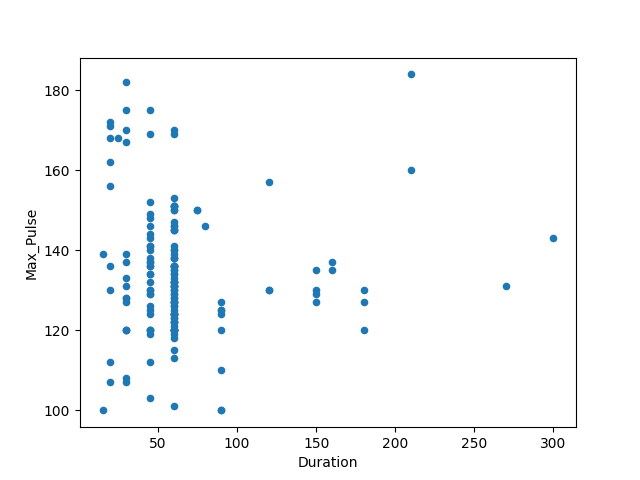

In [7]:
import matplotlib
matplotlib.use('TkAgg')
import tempfile
import pandas as pd
import matplotlib.pyplot as plt

full_health_data = pd.read_csv(DATA, header=0, sep=",")
full_health_data.plot(x ='Duration', y='Max_Pulse', kind='scatter')

temp_file = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
plt.savefig(temp_file.name)

from IPython.display import Image
Image(filename=temp_file.name)

## Matriz de Correlación 
Una matriz de correlación es simplemente una tabla que muestra los coeficientes de correlación entre las variables.

In [9]:
import pandas as pd

full_health_data = pd.read_csv(DATA, header=0, sep=",")

Corr_Matrix = round(full_health_data.corr(),2)
print(Corr_Matrix)

                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration             1.00          -0.17       0.00             0.89   
Average_Pulse       -0.17           1.00       0.79             0.02   
Max_Pulse            0.00           0.79       1.00             0.20   
Calorie_Burnage      0.89           0.02       0.20             1.00   
Hours_Work          -0.12          -0.28      -0.27            -0.14   
Hours_Sleep          0.07           0.03       0.09             0.08   

                 Hours_Work  Hours_Sleep  
Duration              -0.12         0.07  
Average_Pulse         -0.28         0.03  
Max_Pulse             -0.27         0.09  
Calorie_Burnage       -0.14         0.08  
Hours_Work             1.00        -0.14  
Hours_Sleep           -0.14         1.00  


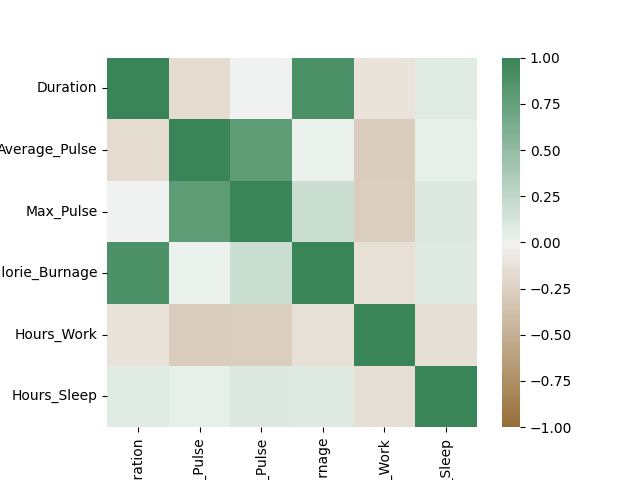

In [11]:
import matplotlib
matplotlib.use('TkAgg')
import tempfile

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

full_health_data = pd.read_csv(DATA, header=0, sep=",")
correlation_full_health = full_health_data.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

temp_file = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
plt.savefig(temp_file.name)

from IPython.display import Image
Image(filename=temp_file.name)